In [97]:
import pandas as pd
import numpy as np
import math
from math import sqrt
from mpmath import erf
from scipy import stats
from scipy.stats import chi2
import matplotlib.pyplot as plt

df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')

In [98]:
N = 22
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
column = cols[N % 7]
data = df[column]

In [99]:
def describe_data(data):
    data = pd.Series(data)
    
    mean_val = data.mean()
    variance_val = data.var(ddof=1)
    mode_val = data.mode().iloc[0] if not data.mode().empty else None
    median_val = data.median()
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.5)
    q75 = data.quantile(0.75)
    kurtosis_val = data.kurtosis()
    skewness_val = data.skew()
    iqr_val = q75 - q25
    
    print(f"Среднее: {mean_val}")
    print(f"Дисперсия: {variance_val}")
    print(f"Мода: {mode_val}")
    print(f"Медиана: {median_val}")
    print(f"Квантиль 0.25: {q25}")
    print(f"Квантиль 0.5: {q50}")
    print(f"Квантиль 0.75: {q75}")
    print(f"Эксцесс: {kurtosis_val}")
    print(f"Асимметрия: {skewness_val}")
    print(f"Интерквартильный размах (IQR): {iqr_val}")

describe_data(data)

Среднее: 6.489766666666668
Дисперсия: 2.2222260208958673
Мода: 6.1
Медиана: 6.5
Квантиль 0.25: 5.5
Квантиль 0.5: 6.5
Квантиль 0.75: 7.5
Эксцесс: -0.2954414857948544
Асимметрия: 0.011854250604519175
Интерквартильный размах (IQR): 2.0


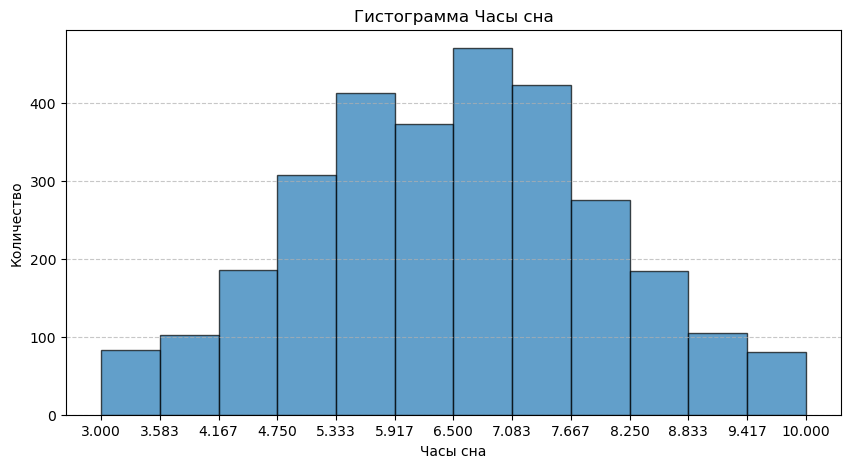

In [77]:
def plot_histogram_sturges(data, column_name="Data", figsize=(10,5), alpha=0.7):
    n = len(data)
    min_val = data.min()
    max_val = data.max()
    
    k = int(1 + 3.322 * math.log10(n))
    intervals = np.linspace(min_val, max_val, k + 1)
    
    plt.figure(figsize=figsize)
    plt.hist(data, bins=intervals, edgecolor='black', alpha=alpha)
    plt.title(f'Гистограмма {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Количество')
    plt.xticks(intervals)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_histogram_sturges(data, column_name="Часы сна")

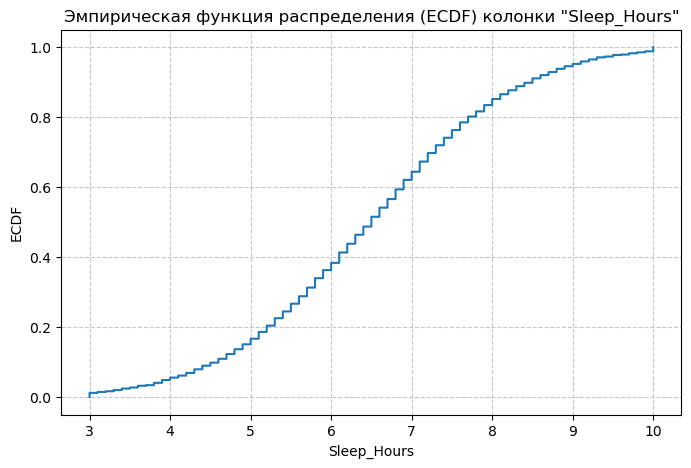

In [100]:
def plot_ecdf(data, column_name="Data"):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    
    plt.figure(figsize=(8,5))
    plt.step(x, y, where='post')
    plt.title(f'Эмпирическая функция распределения (ECDF) колонки "{column_name}"')
    plt.xlabel(column_name)
    plt.ylabel('ECDF')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_ecdf(data, column_name=column)

In [101]:
def chi_square_test(data, alpha=0.05):
    n = len(data)
    mu = data.mean()
    sigma = data.std(ddof=1)
    
    lower = mu - 3 * sigma
    upper = mu + 3 * sigma
    k = int(1 + 3.322 * math.log10(n))
    intervals = np.linspace(lower, upper, k + 1)
    
    O, edges = np.histogram(data, bins=intervals)
    
    def normal_cdf_x(x, mu, sigma):
        return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))
    
    E = []
    for a, b in zip(edges[:-1], edges[1:]):
        p = normal_cdf_x(b, mu, sigma) - normal_cdf_x(a, mu, sigma)
        E.append(n * p)
    E = np.array(E)
    
    O = O.astype(float)
    E = E.astype(float)
    E = E * (O.sum() / E.sum())
    
    m = 2
    df_chi = len(O) - 1 - m
    chi2_stat = np.sum((O - E)**2 / E)
    chi2_crit = chi2.ppf(1 - alpha, df_chi)
    
    print("Хи-квадрат =", chi2_stat)
    print(f"Критическое значение χ² ({1-alpha}) =", chi2_crit)
    print("Вывод:", "Не отвергаем H0" if chi2_stat <= chi2_crit else "Отвергаем H0")

chi_square_test(data)

Хи-квадрат = 91.40886306310088
Критическое значение χ² (0.95) = 16.918977604620448
Вывод: Отвергаем H0


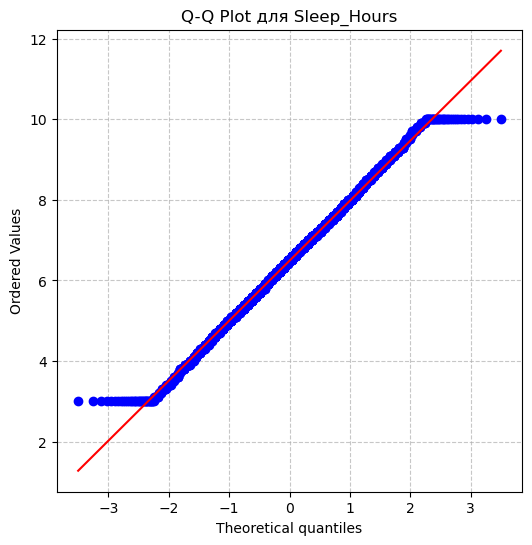

In [102]:
def plot_qq(data, column_name="Data", dist="norm", figsize=(6,6)):
    plt.figure(figsize=figsize)
    stats.probplot(data, dist=dist, plot=plt)
    plt.title(f"Q-Q Plot для {column_name}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_qq(data, column_name="Sleep_Hours")

Среднее: 6.489766666666668
Дисперсия: 2.2222260208958673
Мода: 6.1
Медиана: 6.5
Квантиль 0.25: 5.5
Квантиль 0.5: 6.5
Квантиль 0.75: 7.5
Эксцесс: -0.2954414857948544
Асимметрия: 0.011854250604519175
Интерквартильный размах (IQR): 2.0


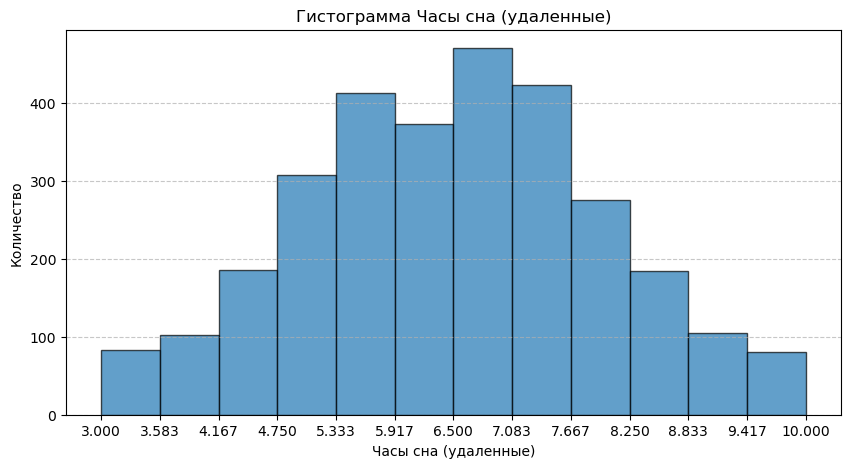

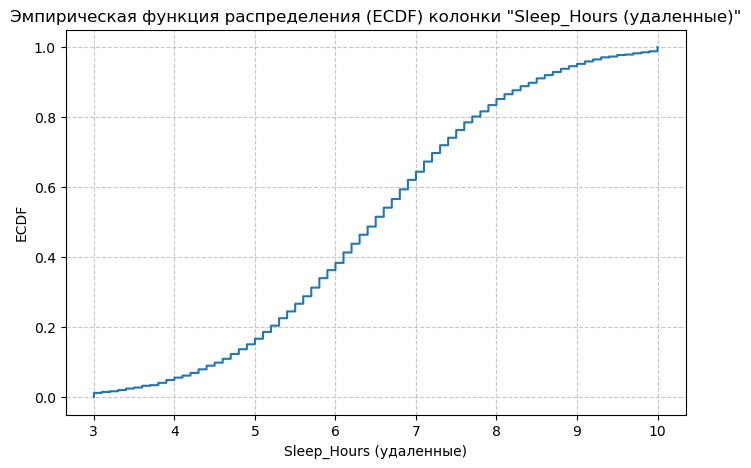

Хи-квадрат = 91.40886306310088
Критическое значение χ² (0.95) = 16.918977604620448
Вывод: Отвергаем H0


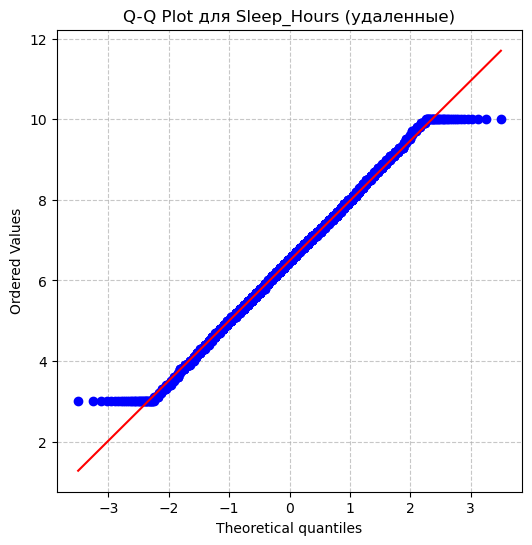

In [110]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
data_trimmed = data[(data >= lower) & (data <= upper)]

describe_data(data_trimmed)
plot_histogram_sturges(data_trimmed, column_name="Часы сна (удаленные)")
plot_ecdf(data_trimmed, column_name=f"{column} (удаленные)")
chi_square_test(data_trimmed)
plot_qq(data_trimmed, column_name="Sleep_Hours (удаленные)")

In [ ]:
Используем технику логарифмирования данных

Среднее: 1.841727135547376
Дисперсия: 0.06009124032844734
Мода: 1.8082887711792655
Медиана: 1.8718021769015913
Квантиль 0.25: 1.7047480922384253
Квантиль 0.5: 1.8718021769015913
Квантиль 0.75: 2.0149030205422647
Эксцесс: 0.394451735237598
Асимметрия: -0.6523307421902413
Интерквартильный размах (IQR): 0.3101549283038394


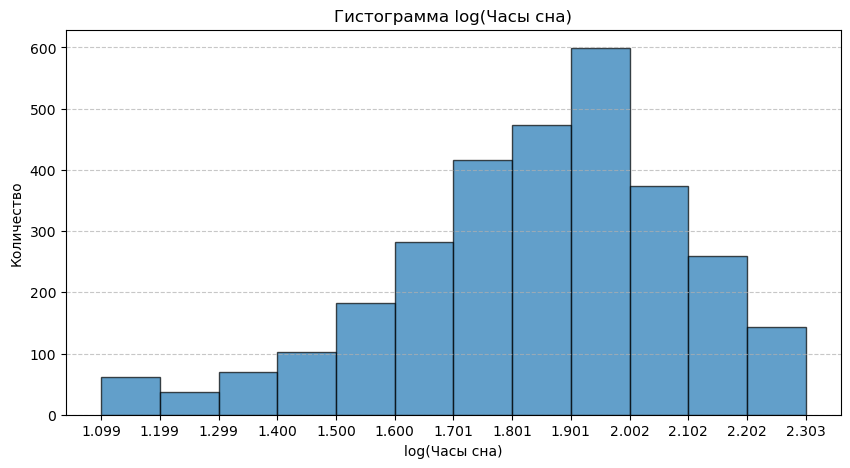

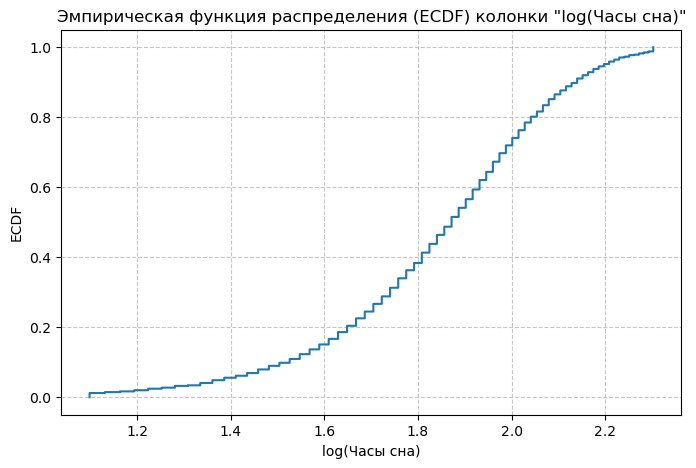

Хи-квадрат = 169.09742637963717
Критическое значение χ² (0.95) = 16.918977604620448
Вывод: Отвергаем H0


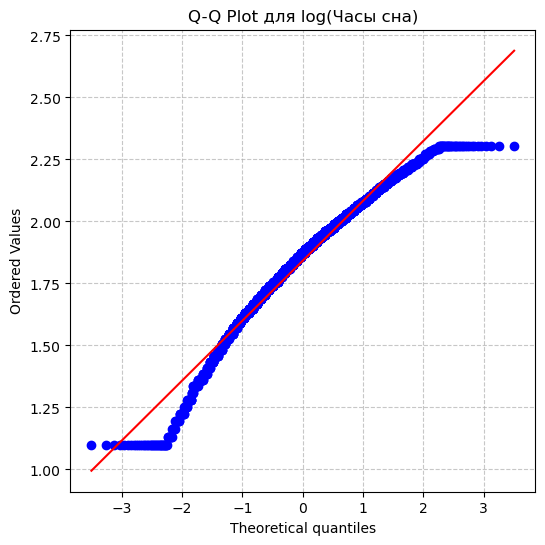

In [105]:
data_log = np.log(data[data > 0])

describe_data(data_log)
plot_histogram_sturges(data_log, column_name="log(Часы сна)")
plot_ecdf(data_log, column_name="log(Часы сна)")
chi_square_test(data_log)
plot_qq(data_log, column_name="log(Часы сна)")

Среднее: -9.166001291305293e-16
Дисперсия: 0.9999999999999906
Мода: -0.2614632051361351
Медиана: 0.006864722823636581
Квантиль 0.25: -0.663955097075792
Квантиль 0.5: 0.006864722823636581
Квантиль 0.75: 0.6776845427230651
Эксцесс: -0.29544148579485396
Асимметрия: 0.011854250604521905
Интерквартильный размах (IQR): 1.3416396397988573


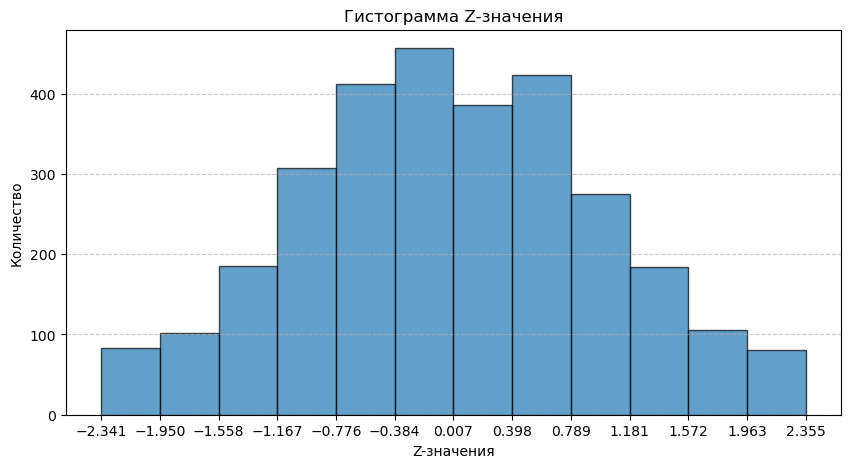

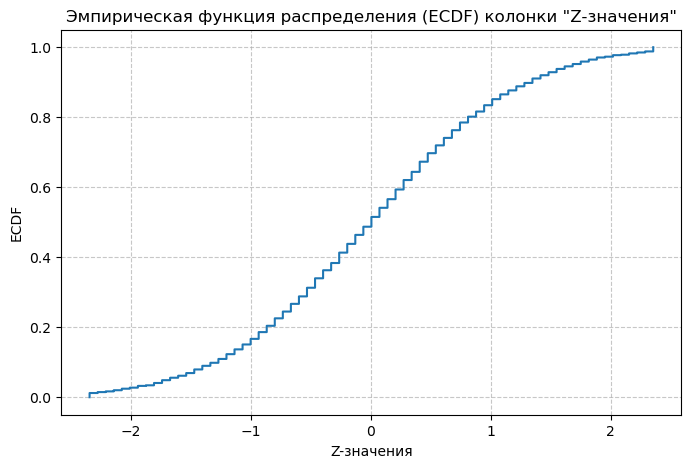

Хи-квадрат = 91.40886306310102
Критическое значение χ² (0.95) = 16.918977604620448
Вывод: Отвергаем H0


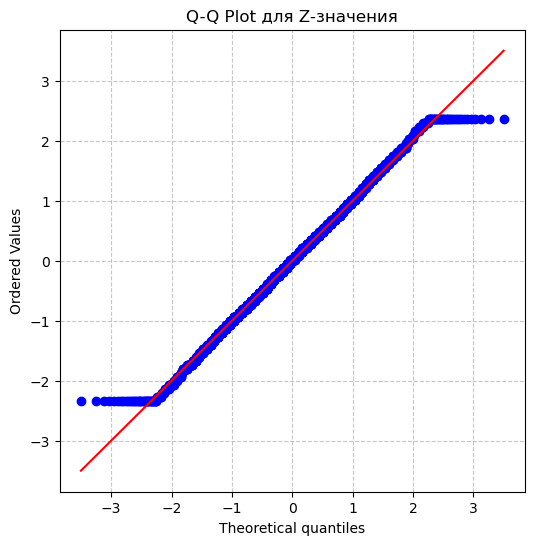

In [114]:
data_std = (data - data.mean()) / data.std(ddof=1)

describe_data(data_std)
plot_histogram_sturges(data_std, column_name="Z-значения")
plot_ecdf(data_std, column_name="Z-значения")
chi_square_test(data_std)
plot_qq(data_std, column_name="Z-значения")

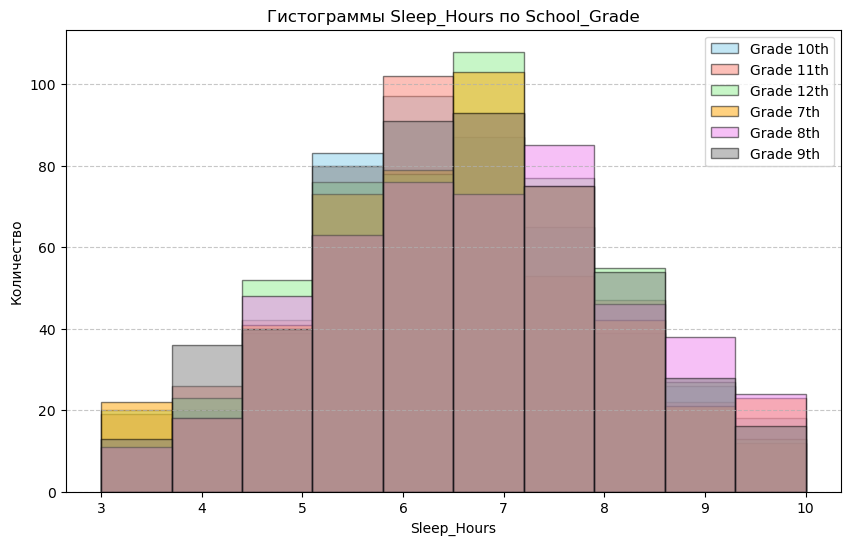

=== Среднее и дисперсия по каждой группе ===
Grade 10th: Среднее = 6.49, Дисперсия = 2.10
Grade 11th: Среднее = 6.37, Дисперсия = 2.11
Grade 12th: Среднее = 6.46, Дисперсия = 2.20
Grade 7th: Среднее = 6.48, Дисперсия = 2.29
Grade 8th: Среднее = 6.68, Дисперсия = 2.41
Grade 9th: Среднее = 6.47, Дисперсия = 2.20


In [90]:
column = 'Sleep_Hours'
group_col = 'School_Grade'

groups = df.groupby(group_col)

plt.figure(figsize=(10,6))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'grey', 'cyan']

stats_dict = {}
for i, (grade, group_data) in enumerate(groups):
    data_values = group_data[column]
    mean_val = data_values.mean()
    var_val = data_values.var(ddof=1)
    
    stats_dict[grade] = {'mean': mean_val, 'variance': var_val}
    
    plt.hist(data_values, bins=10, alpha=0.5, label=f'Grade {grade}', color=colors[i % len(colors)], edgecolor='black')

plt.title(f'Гистограммы {column} по School_Grade')
plt.xlabel(column)
plt.ylabel('Количество')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("=== Среднее и дисперсия по каждой группе ===")
for grade, stats in stats_dict.items():
    print(f"Grade {grade}: Среднее = {stats['mean']:.2f}, Дисперсия = {stats['variance']:.2f}")